# Koch Snowflake Fractal

## Introduction

The **Koch snowflake** is one of the earliest described fractal curves, first appearing in a 1904 paper by Swedish mathematician Helge von Koch. It exemplifies how a simple recursive rule can generate infinitely complex geometric structures with remarkable mathematical properties.

## Mathematical Foundation

### Construction Algorithm

The Koch curve is constructed iteratively starting from a line segment:

1. Divide the line segment into three equal parts
2. Construct an equilateral triangle using the middle segment as the base (pointing outward)
3. Remove the base of the triangle
4. Apply this process recursively to each of the four resulting segments

The Koch snowflake is formed by applying this construction to all three sides of an equilateral triangle.

### Geometric Properties

#### Length After $n$ Iterations

If the initial side length is $L_0$, then after $n$ iterations:

$$L_n = L_0 \cdot \left(\frac{4}{3}\right)^n$$

As $n \to \infty$, the perimeter diverges:

$$\lim_{n \to \infty} L_n = \infty$$

#### Number of Segments

The number of line segments after $n$ iterations for a single Koch curve:

$$N_n = 4^n$$

For the complete snowflake (three sides):

$$N_n^{\text{snowflake}} = 3 \cdot 4^n$$

#### Area Convergence

Despite having infinite perimeter, the Koch snowflake encloses a finite area. Starting with an equilateral triangle of area $A_0$:

$$A_n = A_0 \left(1 + \sum_{k=1}^{n} \frac{3 \cdot 4^{k-1}}{9^k}\right)$$

The limiting area is:

$$A_\infty = \frac{8}{5} A_0 = \frac{2\sqrt{3}}{5} s^2$$

where $s$ is the side length of the initial triangle.

### Fractal Dimension

The Hausdorff dimension (fractal dimension) of the Koch curve is:

$$D = \frac{\ln 4}{\ln 3} \approx 1.2619$$

This non-integer dimension captures the curve's property of being "more than a line but less than a plane" - it fills space more densely than a 1D curve but doesn't completely cover a 2D region.

## Implementation

We will implement the Koch snowflake using complex number arithmetic, which elegantly handles the rotations required for the construction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def koch_curve(start, end, iterations):
    """
    Generate points for a Koch curve between start and end points.
    
    Parameters:
    -----------
    start : complex
        Starting point as a complex number
    end : complex
        Ending point as a complex number
    iterations : int
        Number of recursive iterations
    
    Returns:
    --------
    list of complex
        Points defining the Koch curve
    """
    if iterations == 0:
        return [start, end]
    
    # Calculate the four key points for the Koch construction
    # Point 1: start
    # Point 2: 1/3 along the line
    # Point 3: peak of the equilateral triangle
    # Point 4: 2/3 along the line
    # Point 5: end
    
    p1 = start
    p5 = end
    
    # Divide segment into thirds
    p2 = start + (end - start) / 3
    p4 = start + 2 * (end - start) / 3
    
    # Calculate peak point (rotate middle segment by 60 degrees)
    # Using complex number rotation: multiply by e^(iπ/3)
    rotation = np.exp(1j * np.pi / 3)
    p3 = p2 + (p4 - p2) * rotation
    
    # Recursively generate Koch curves for each segment
    curve = []
    for segment_start, segment_end in [(p1, p2), (p2, p3), (p3, p4), (p4, p5)]:
        segment_points = koch_curve(segment_start, segment_end, iterations - 1)
        # Avoid duplicating points at segment boundaries
        if curve:
            curve.extend(segment_points[1:])
        else:
            curve.extend(segment_points)
    
    return curve

def koch_snowflake(iterations, center=(0, 0), size=1):
    """
    Generate points for a complete Koch snowflake.
    
    Parameters:
    -----------
    iterations : int
        Number of recursive iterations
    center : tuple
        Center coordinates of the snowflake
    size : float
        Size scaling factor
    
    Returns:
    --------
    numpy.ndarray
        Array of (x, y) coordinates
    """
    # Create vertices of initial equilateral triangle
    # Pointing upward, centered at origin
    angles = [np.pi/2, np.pi/2 + 2*np.pi/3, np.pi/2 + 4*np.pi/3]
    vertices = [size * np.exp(1j * angle) for angle in angles]
    
    # Generate Koch curve for each side
    snowflake_points = []
    for i in range(3):
        side_points = koch_curve(vertices[i], vertices[(i + 1) % 3], iterations)
        if snowflake_points:
            snowflake_points.extend(side_points[1:])  # Avoid duplicate points
        else:
            snowflake_points.extend(side_points)
    
    # Close the snowflake
    snowflake_points.append(snowflake_points[0])
    
    # Convert to numpy array of (x, y) coordinates
    points = np.array([[p.real + center[0], p.imag + center[1]] for p in snowflake_points])
    
    return points

print("Koch snowflake functions defined successfully.")

Koch snowflake functions defined successfully.


## Visualization of Iterative Construction

Let's visualize how the Koch snowflake evolves through successive iterations, demonstrating the self-similar nature of the fractal.

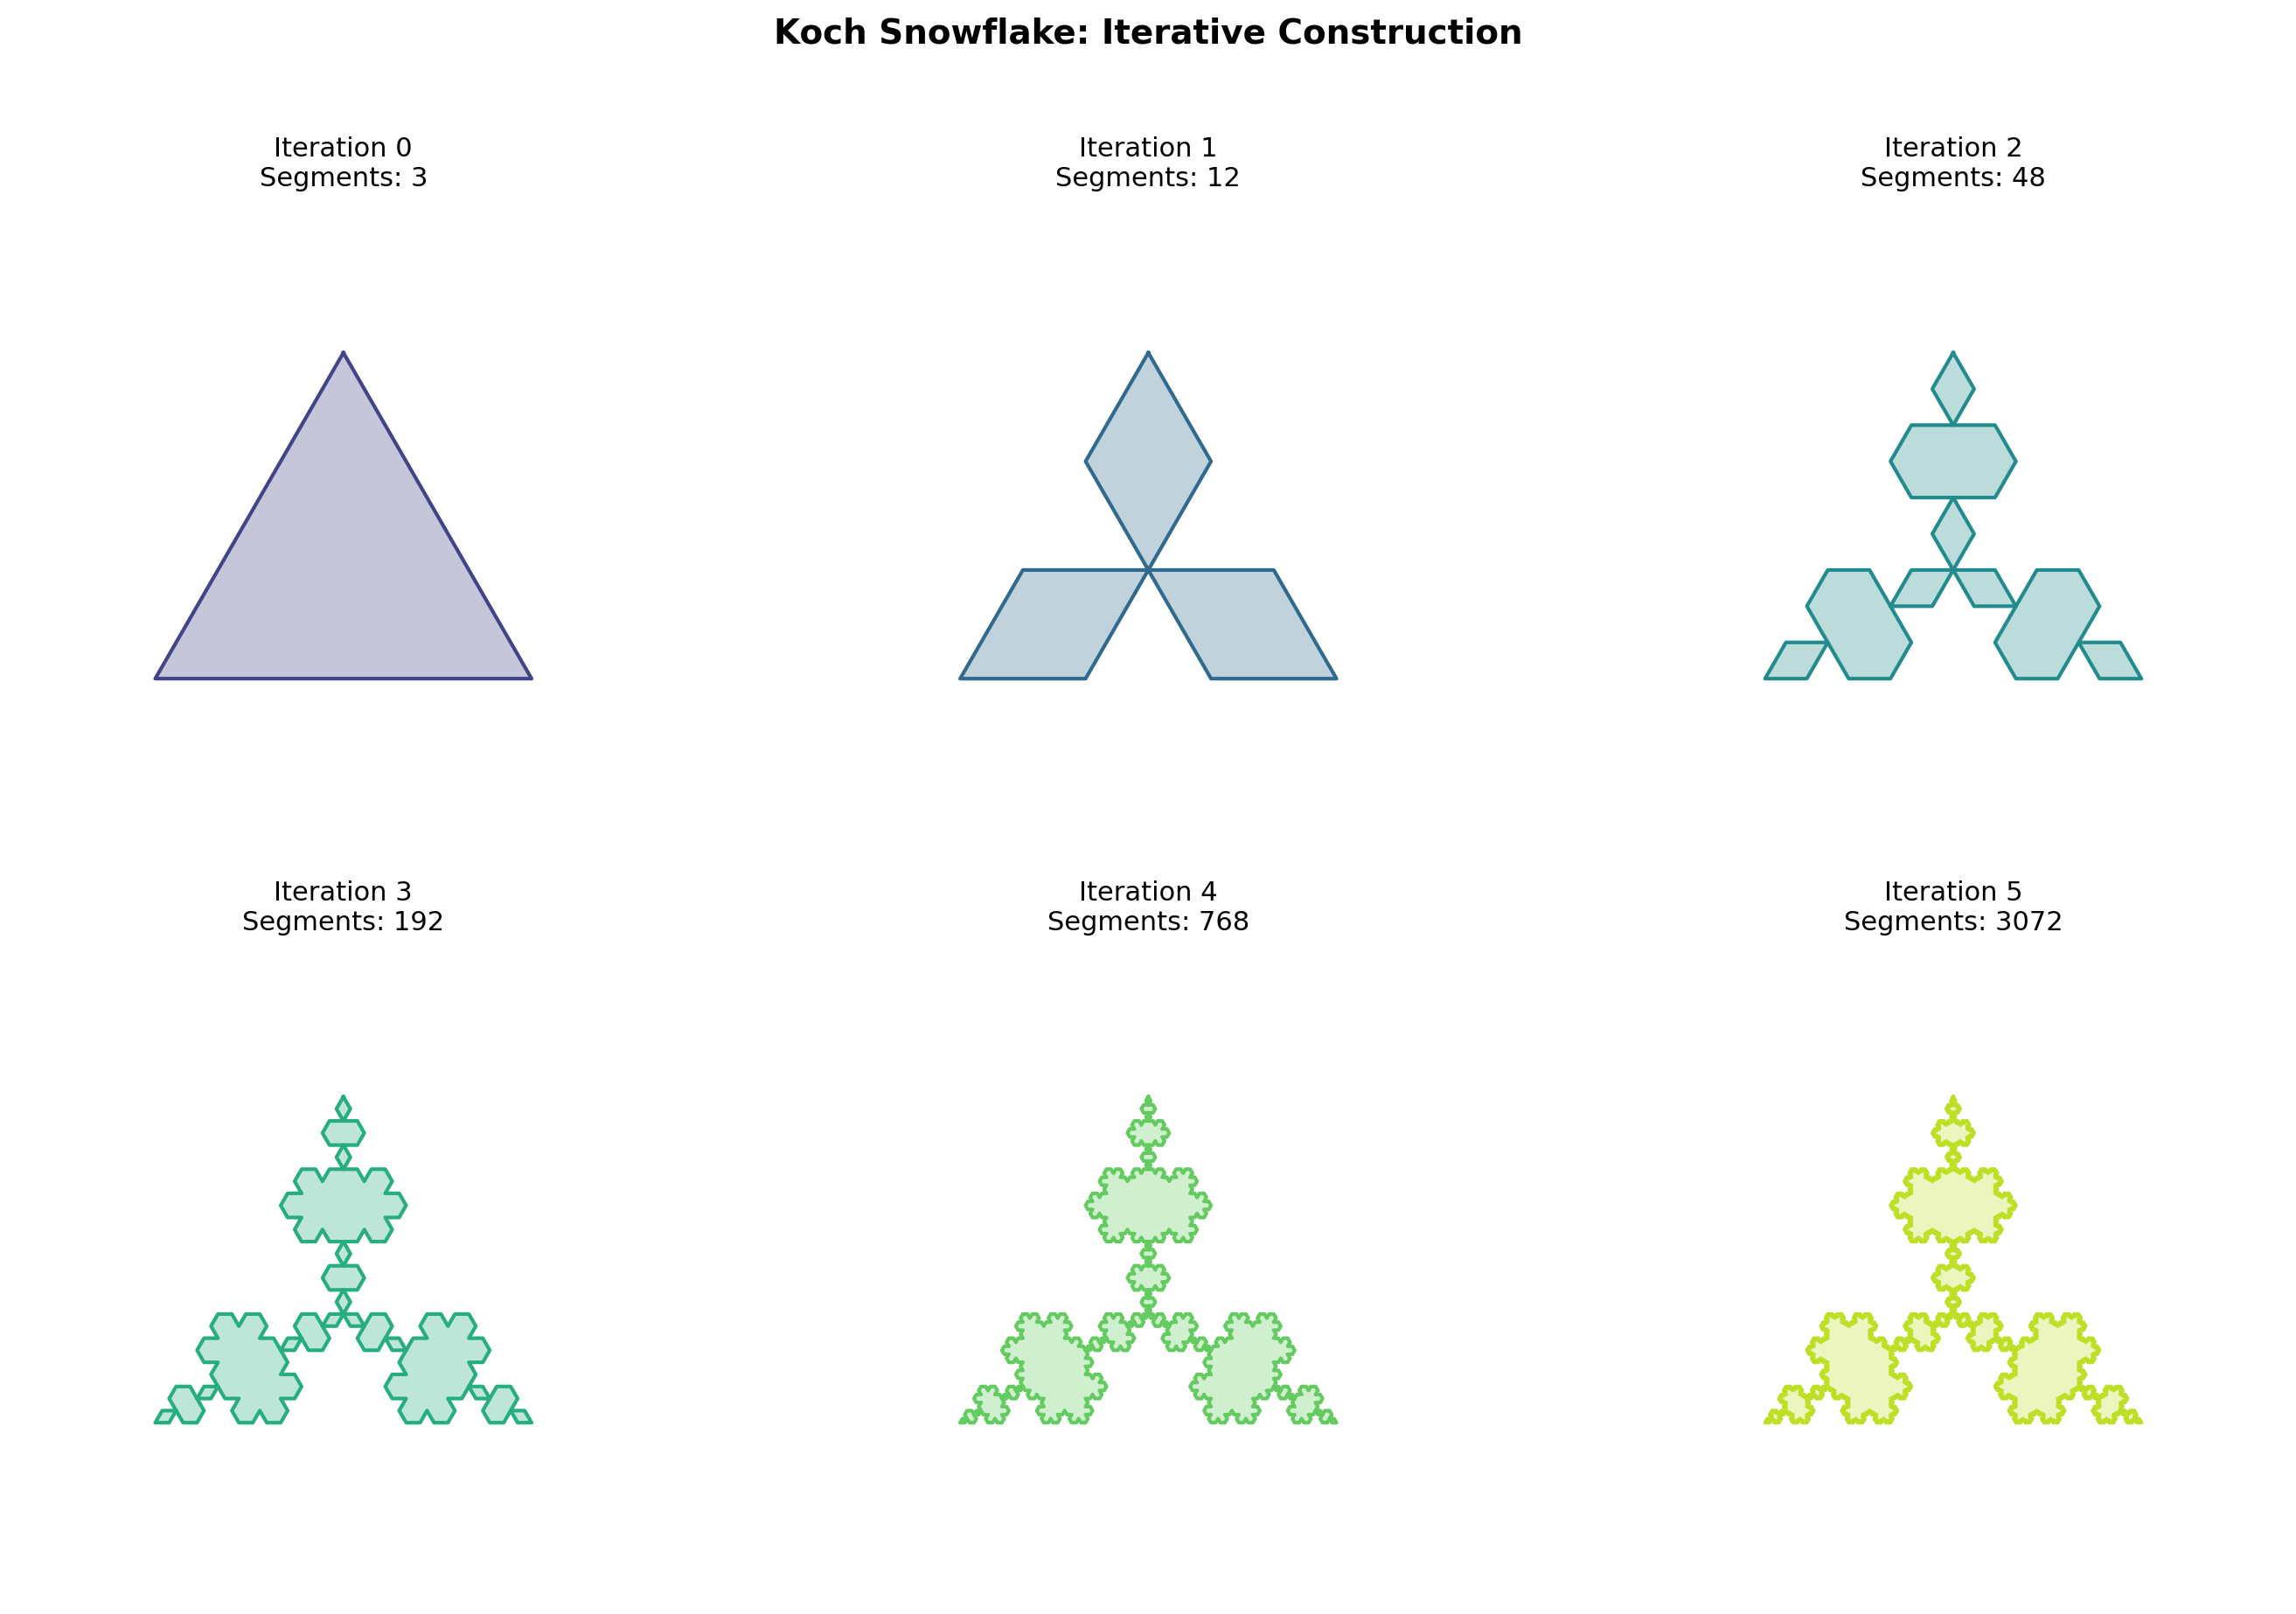


Plot saved to 'plot.png'


In [2]:
# Create figure showing progressive iterations
fig, axes = plt.subplots(2, 3, figsize=(14, 9))
axes = axes.flatten()

# Color scheme for iterations
colors = plt.cm.viridis(np.linspace(0.2, 0.9, 6))

for i, ax in enumerate(axes):
    points = koch_snowflake(i, size=1)
    
    # Calculate properties
    num_segments = 3 * (4 ** i) if i > 0 else 3
    perimeter_ratio = (4/3) ** i
    
    # Plot the snowflake
    ax.plot(points[:, 0], points[:, 1], color=colors[i], linewidth=1.5)
    ax.fill(points[:, 0], points[:, 1], alpha=0.3, color=colors[i])
    
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.3, 1.7)
    ax.set_aspect('equal')
    ax.set_title(f'Iteration {i}\nSegments: {num_segments}', fontsize=11)
    ax.axis('off')

plt.suptitle('Koch Snowflake: Iterative Construction', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('koch_snowflake_fractal_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nPlot saved to 'plot.png'")

## Mathematical Analysis

Let's verify the theoretical predictions for perimeter growth and area convergence.

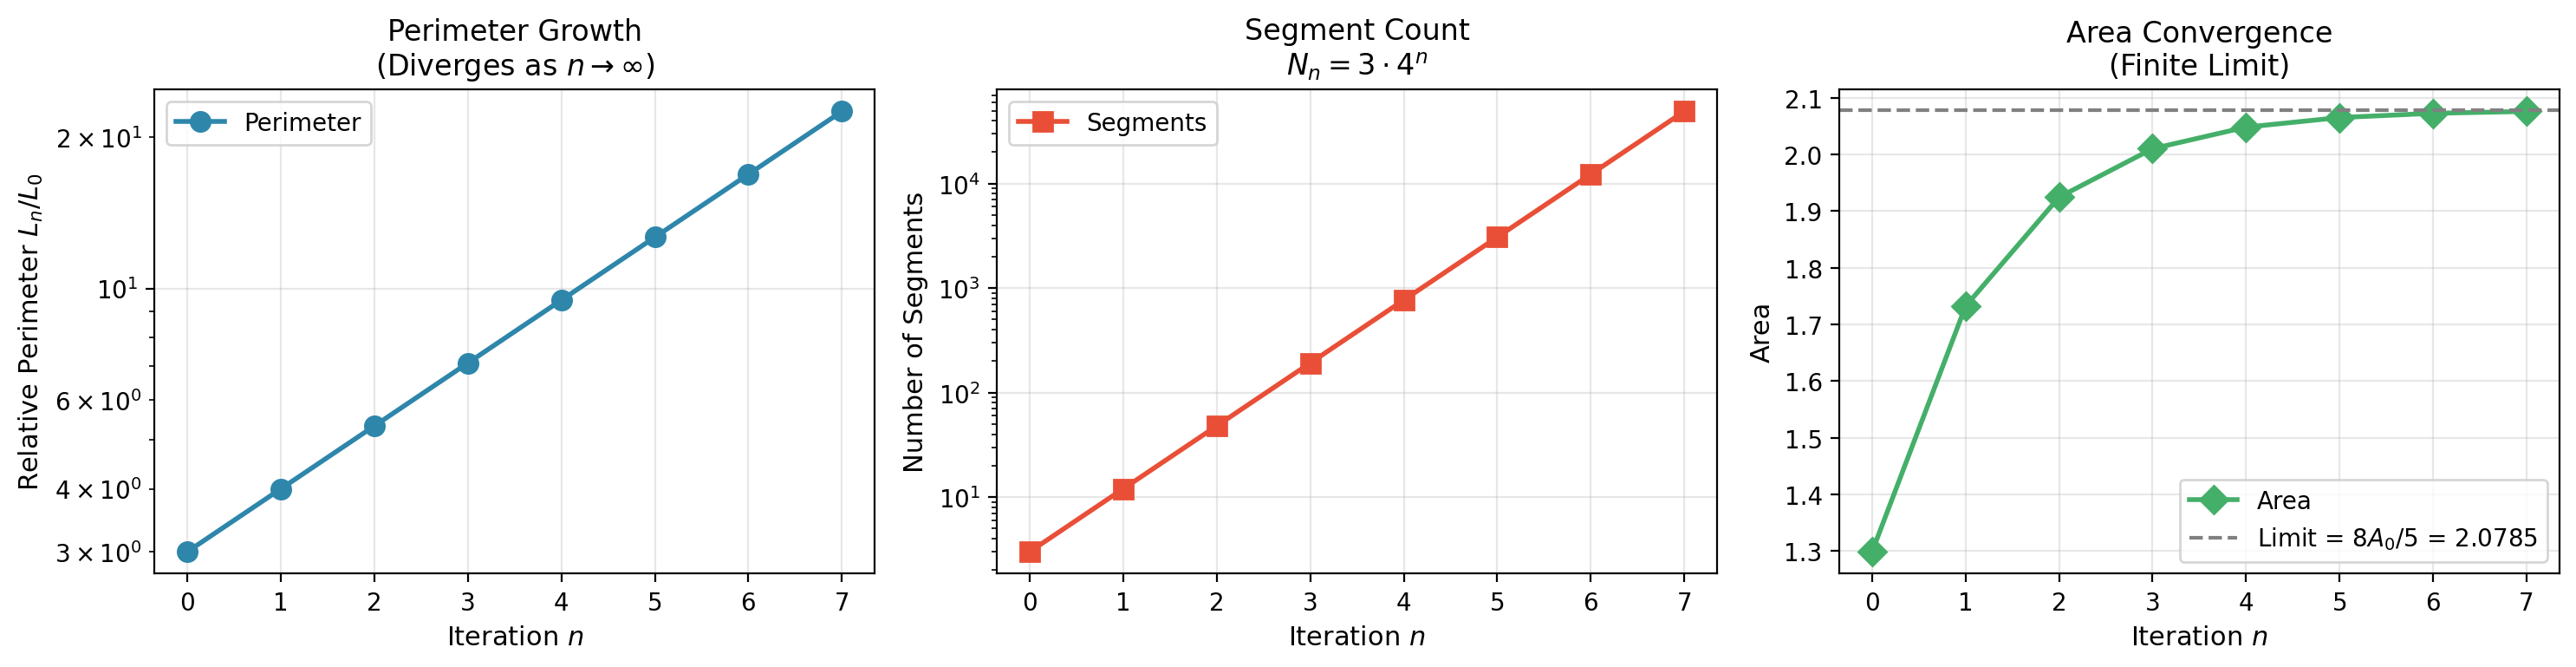


MATHEMATICAL ANALYSIS OF KOCH SNOWFLAKE

Fractal Dimension: D = ln(4)/ln(3) = 1.261860

Initial Triangle Area (A₀): 1.299038
Limiting Area (A∞ = 8A₀/5): 2.078461

Area increase from initial: 60.00%

------------------------------------------------------------
 Iteration     Segments   Rel. Perimeter         Area
------------------------------------------------------------
         0            3           3.0000     1.299038
         1           12           4.0000     1.732051
         2           48           5.3333     1.924501
         3          192           7.1111     2.010034
         4          768           9.4815     2.048049
         5        3,072          12.6420     2.064945
         6       12,288          16.8560     2.072454
         7       49,152          22.4746     2.075791


In [3]:
# Analyze mathematical properties
iterations_range = range(8)

# Calculate theoretical values
perimeters_theoretical = [3 * (4/3)**n for n in iterations_range]
segments = [3 * 4**n for n in iterations_range]

# Initial triangle area (unit size)
A0 = (np.sqrt(3) / 4) * (np.sqrt(3))**2  # Equilateral triangle with vertices at distance 1 from center
A0 = 3 * np.sqrt(3) / 4  # Corrected for our triangle

# Area calculation
areas = []
for n in iterations_range:
    if n == 0:
        area = A0
    else:
        # Each iteration adds triangles
        area = A0 * (1 + sum(3 * 4**(k-1) / 9**k for k in range(1, n+1)))
    areas.append(area)

# Limiting area
A_inf = (8/5) * A0

# Create analysis plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Perimeter growth
ax1 = axes[0]
ax1.semilogy(list(iterations_range), perimeters_theoretical, 'o-', color='#2E86AB', 
             linewidth=2, markersize=8, label='Perimeter')
ax1.set_xlabel('Iteration $n$', fontsize=11)
ax1.set_ylabel('Relative Perimeter $L_n/L_0$', fontsize=11)
ax1.set_title('Perimeter Growth\n(Diverges as $n \\to \\infty$)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Number of segments
ax2 = axes[1]
ax2.semilogy(list(iterations_range), segments, 's-', color='#E94F37', 
             linewidth=2, markersize=8, label='Segments')
ax2.set_xlabel('Iteration $n$', fontsize=11)
ax2.set_ylabel('Number of Segments', fontsize=11)
ax2.set_title('Segment Count\n$N_n = 3 \\cdot 4^n$', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: Area convergence
ax3 = axes[2]
ax3.plot(list(iterations_range), areas, 'D-', color='#44AF69', 
         linewidth=2, markersize=8, label='Area')
ax3.axhline(y=A_inf, color='gray', linestyle='--', linewidth=1.5, 
            label=f'Limit = $8A_0/5$ = {A_inf:.4f}')
ax3.set_xlabel('Iteration $n$', fontsize=11)
ax3.set_ylabel('Area', fontsize=11)
ax3.set_title('Area Convergence\n(Finite Limit)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()

# Print numerical results
print("\n" + "="*60)
print("MATHEMATICAL ANALYSIS OF KOCH SNOWFLAKE")
print("="*60)
print(f"\nFractal Dimension: D = ln(4)/ln(3) = {np.log(4)/np.log(3):.6f}")
print(f"\nInitial Triangle Area (A₀): {A0:.6f}")
print(f"Limiting Area (A∞ = 8A₀/5): {A_inf:.6f}")
print(f"\nArea increase from initial: {(A_inf/A0 - 1)*100:.2f}%")
print("\n" + "-"*60)
print(f"{'Iteration':>10} {'Segments':>12} {'Rel. Perimeter':>16} {'Area':>12}")
print("-"*60)
for n in iterations_range:
    print(f"{n:>10} {segments[n]:>12,} {perimeters_theoretical[n]:>16.4f} {areas[n]:>12.6f}")

## Self-Similarity Demonstration

A key characteristic of fractals is **self-similarity**: the whole has the same shape as one or more of its parts. Let's visualize this by zooming into a portion of the Koch snowflake.

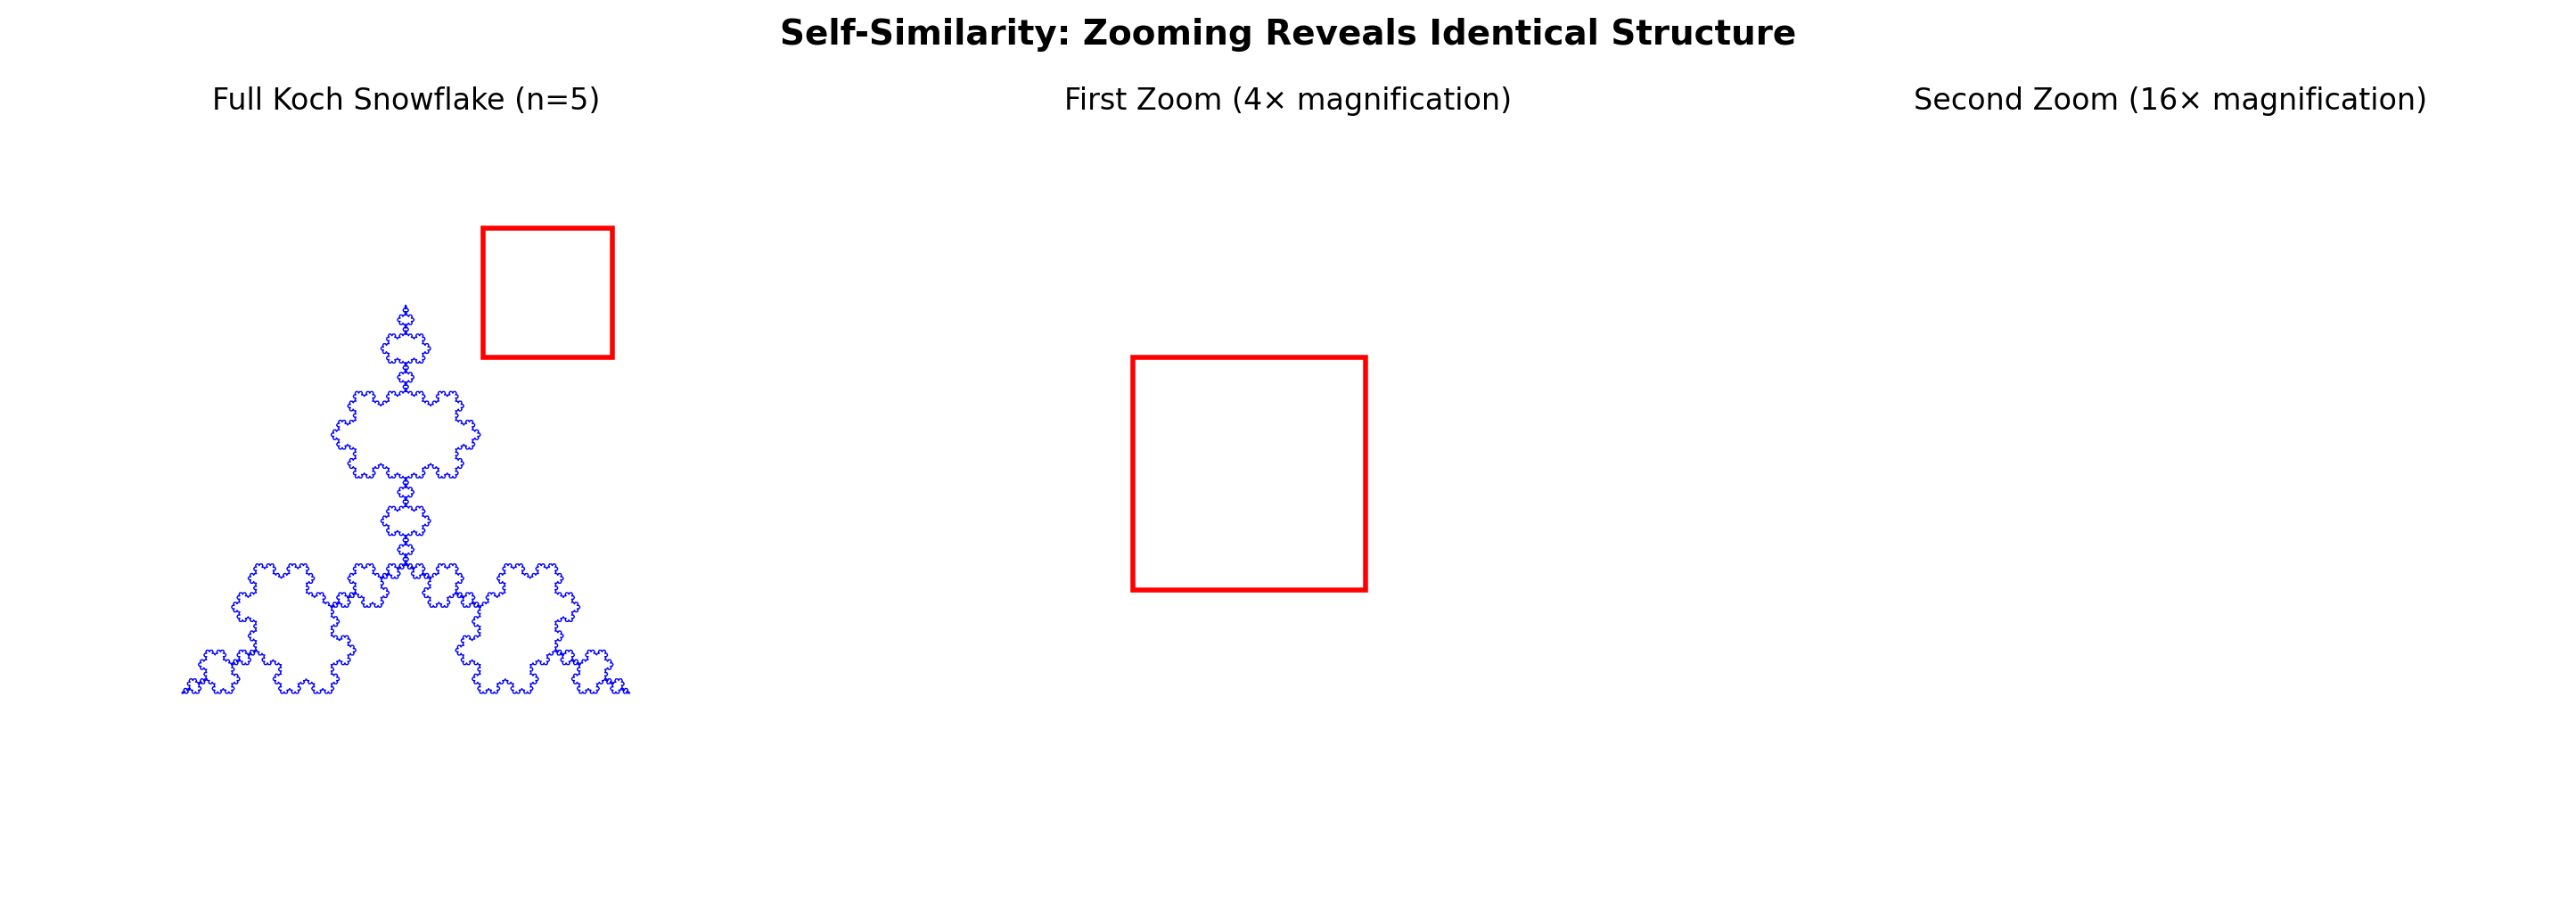


Note: At any zoom level, the Koch curve exhibits the same structural pattern.
This self-similarity at all scales is the hallmark of a true fractal.


In [4]:
# Demonstrate self-similarity with zoom
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Generate high-iteration snowflake
points = koch_snowflake(5, size=1)

# Full view
ax1 = axes[0]
ax1.plot(points[:, 0], points[:, 1], 'b-', linewidth=0.5)
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.3, 1.7)

# Draw zoom box
zoom_box = plt.Rectangle((0.3, 0.8), 0.5, 0.5, fill=False, 
                          edgecolor='red', linewidth=2)
ax1.add_patch(zoom_box)
ax1.set_aspect('equal')
ax1.set_title('Full Koch Snowflake (n=5)', fontsize=12)
ax1.axis('off')

# First zoom
ax2 = axes[1]
ax2.plot(points[:, 0], points[:, 1], 'b-', linewidth=0.8)
ax2.set_xlim(0.3, 0.8)
ax2.set_ylim(0.8, 1.3)

# Draw second zoom box
zoom_box2 = plt.Rectangle((0.45, 1.0), 0.15, 0.15, fill=False, 
                           edgecolor='red', linewidth=2)
ax2.add_patch(zoom_box2)
ax2.set_aspect('equal')
ax2.set_title('First Zoom (4× magnification)', fontsize=12)
ax2.axis('off')

# Second zoom
ax3 = axes[2]
ax3.plot(points[:, 0], points[:, 1], 'b-', linewidth=1.2)
ax3.set_xlim(0.45, 0.6)
ax3.set_ylim(1.0, 1.15)
ax3.set_aspect('equal')
ax3.set_title('Second Zoom (16× magnification)', fontsize=12)
ax3.axis('off')

plt.suptitle('Self-Similarity: Zooming Reveals Identical Structure', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nNote: At any zoom level, the Koch curve exhibits the same structural pattern.")
print("This self-similarity at all scales is the hallmark of a true fractal.")

## Conclusion

The Koch snowflake beautifully illustrates several fundamental concepts in fractal geometry:

1. **Infinite perimeter, finite area**: A curve can be arbitrarily long while still enclosing a bounded region

2. **Non-integer dimension**: The fractal dimension $D \approx 1.26$ captures the curve's space-filling properties

3. **Self-similarity**: The same pattern appears at every scale of magnification

4. **Simple rules, complex results**: A straightforward recursive algorithm generates infinite complexity

These properties make the Koch snowflake a paradigmatic example for understanding fractals and their applications in modeling natural phenomena like coastlines, mountain ranges, and biological structures.